# Numpy and Machine Learning

In [179]:
import numpy as np
from scipy import stats

speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

In [180]:
print(np.mean(speed))

89.76923076923077


In [181]:
print(np.median(speed))

87.0


In [182]:
print(stats.mode(speed))

ModeResult(mode=array([86]), count=array([3]))


In [183]:
print(np.std(speed))

9.258292301032677


In [184]:
print(np.var(speed))

85.71597633136093


In [185]:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]
print(np.percentile(ages, 80))

48.0


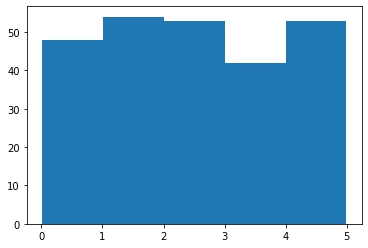

In [186]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(0.0, 5.0, 250)

plt.hist(x, 5)
plt.show()

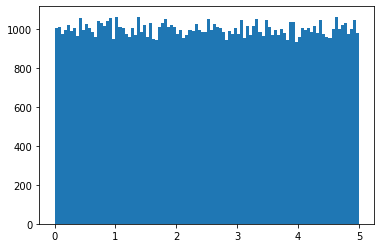

In [187]:
y = np.random.uniform(0.0, 5.0, 100000)

plt.hist(y, 100)
plt.show()

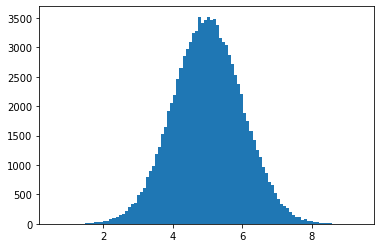

In [188]:
z = np.random.normal(5.0, 1.0, 100000)

plt.hist(z, 100)
plt.show()

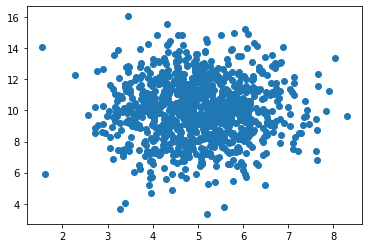

In [189]:
x = np.random.normal(loc=5, scale=1, size=1000)
y = np.random.normal(10, 2, 1000)

plt.scatter(x, y)
plt.show()

### lineal regression:

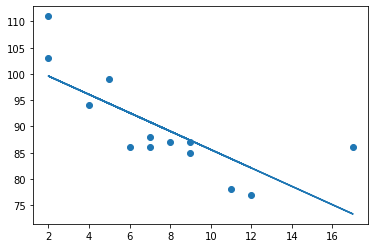

85.59


In [190]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
print(round(myfunc(10), 2))

### polynomial regression:

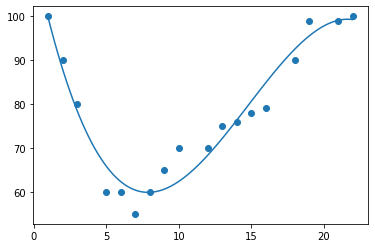

0.9432150416451025
71.16759559890414
88.87331269697991


In [191]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()
print(r2_score(y, mymodel(x)))
print(mymodel(4))
print(mymodel(17))

### multiple regression:

In [192]:
import pandas as pd
from sklearn import linear_model

car = pd.read_csv("cars.csv")

X = car[['Weight', 'Volume']]
y = car['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300ccm:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)
print(regr.coef_)
print(regr.predict([[3300, 1300]]))
print(regr.predict([[2300, 2300]]))

[107.2087328]
[0.00755095 0.00780526]
[114.75968007]
[115.01399033]


In [193]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()

Xl = car[['Weight', 'VolumeL']]

scaledX = scale.fit_transform(Xl)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

print(regr.predict(scale.transform([[2300, 1.3]])))

[107.2087328]


### Train/Test

41.3310952777382
0.8491459755938984
0.8664474379613951


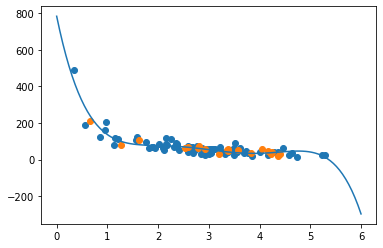

In [194]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 5))
myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.plot(myline, mymodel(myline))
plt.show

print(mymodel(5))
print(r2_score(train_y, mymodel(train_x)))
print(r2_score(test_y, mymodel(test_x)))

### Decision tree

In [10]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

shows = pd.read_csv("shows.csv")

countryCode = {'UK': 0, 'USA': 1, 'N': 2}
shows['Nationality'] = shows['Nationality'].map(countryCode)
toGo = {'YES': 1, 'NO': 0}
shows['Go'] = shows['Go'].map(toGo)

features = ['Age', 'Experience', 'Rank', 'Nationality']
X = shows[features]
y = shows['Go']

print(X)
print(y)

Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


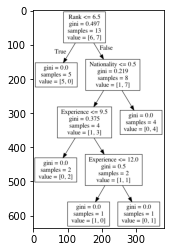

[1]
[1] means 'GO'
[0] means 'NO'


In [35]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

print(dtree.predict([[40, 10, 7, 1]]))

print("[1] means 'GO'")
print("[0] means 'NO'")

